In [84]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# 1. Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Ver las primeras filas
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [85]:
# 2. Análisis exploratorio de los datos
# Ver la información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [86]:
# Ver las estadísticas descriptivas
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


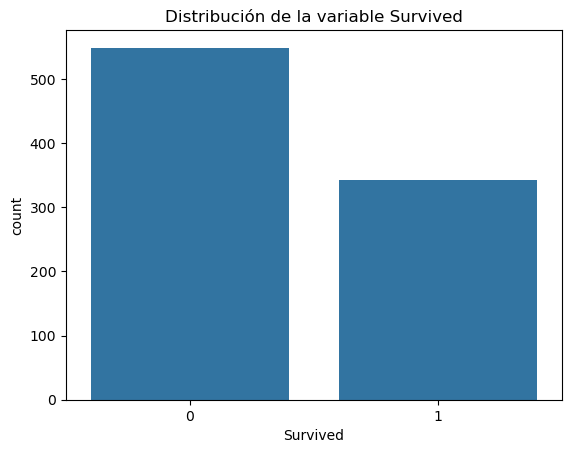

In [87]:
# Visualización de la distribución de la variable objetivo (Survived)
sns.countplot(x='Survived', data=df)
plt.title('Distribución de la variable Survived')
plt.show()

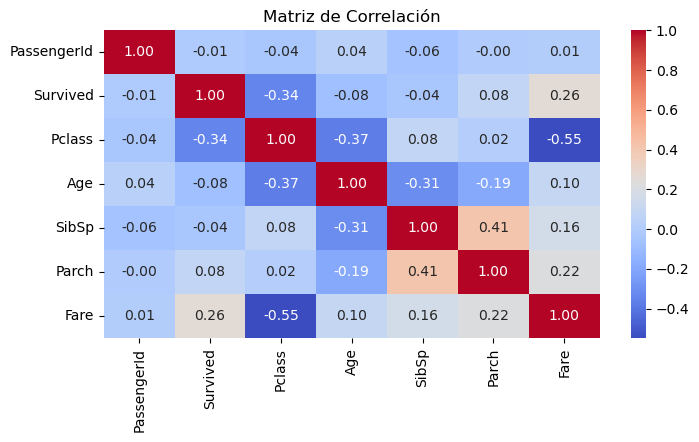

In [90]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular y graficar la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(df_numerico.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

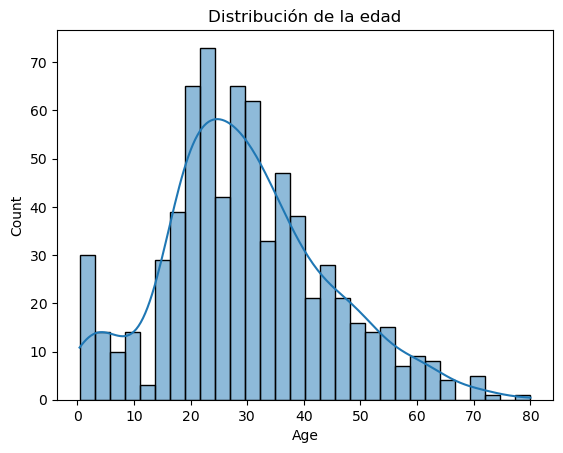

In [91]:
# Visualización de la distribución de 'Age' y 'Fare'
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de la edad')
plt.show()

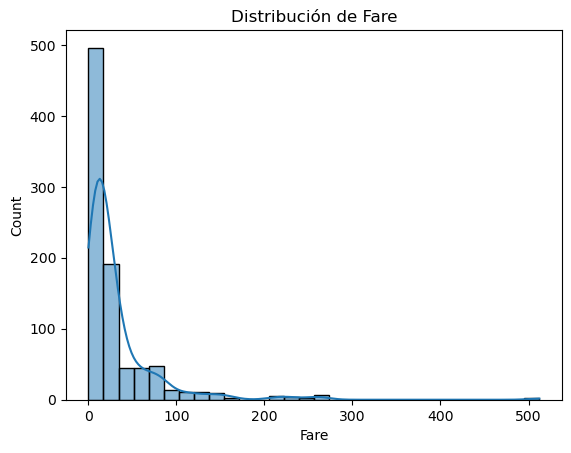

In [92]:
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribución de Fare')
plt.show()

In [93]:
# 3. Preprocesamiento de los datos

# Manejar valores nulos
# Rellenar valores nulos en 'Age' con la media
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Rellenar valores nulos en 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convertir la variable categórica 'Sex' a valores numéricos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convertir la variable 'Embarked' a variables dummy
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Eliminar columnas no relevantes como 'Name', 'Ticket', 'Cabin', 'PassengerId'
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [94]:
# Verificación del dataset después de limpieza
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [95]:
# 4. Manejo de valores atípicos
# Detectamos los valores atípicos con el método IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

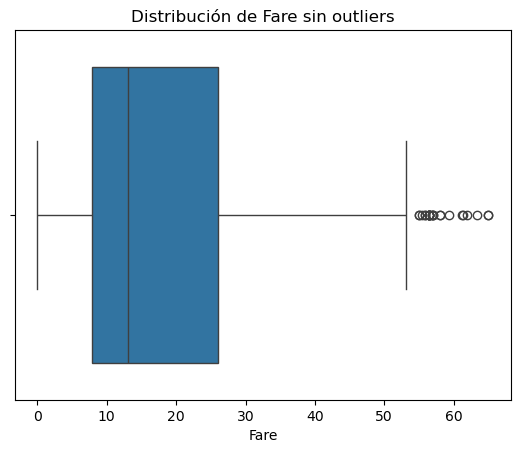

In [96]:
# Visualizamos si eliminamos los outliers correctamente
sns.boxplot(x=df['Fare'])
plt.title('Distribución de Fare sin outliers')
plt.show()


In [97]:
# 5. Selección de características
# Separamos las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [98]:
# 6. Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# 7. Escalar los datos (si es necesario)
# En este caso, no es estrictamente necesario escalar para Árboles de Decisión, pero se puede hacer por precaución.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# 8. Entrenamiento del modelo de Árbol de Decisión
# Configurar el modelo con algunos hiperparámetros básicos
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [101]:
# 9. Predicciones
y_pred = dt_model.predict(X_test_scaled)

In [102]:
# 10. Evaluación del desempeño del modelo
# Evaluar el desempeño utilizando métricas estándar
print("Métricas del Modelo:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Métricas del Modelo:
Accuracy: 0.7741935483870968
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        95
           1       0.73      0.67      0.70        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.76       155
weighted avg       0.77      0.77      0.77       155



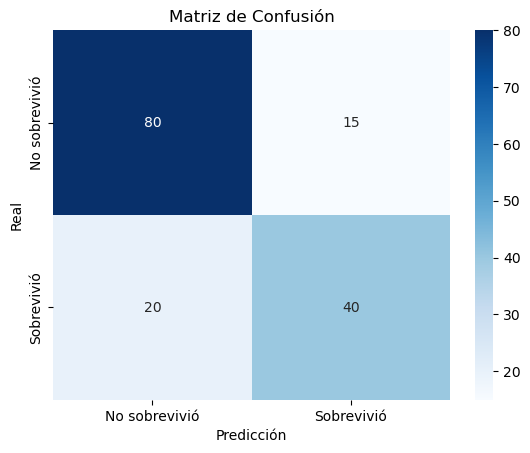

In [103]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

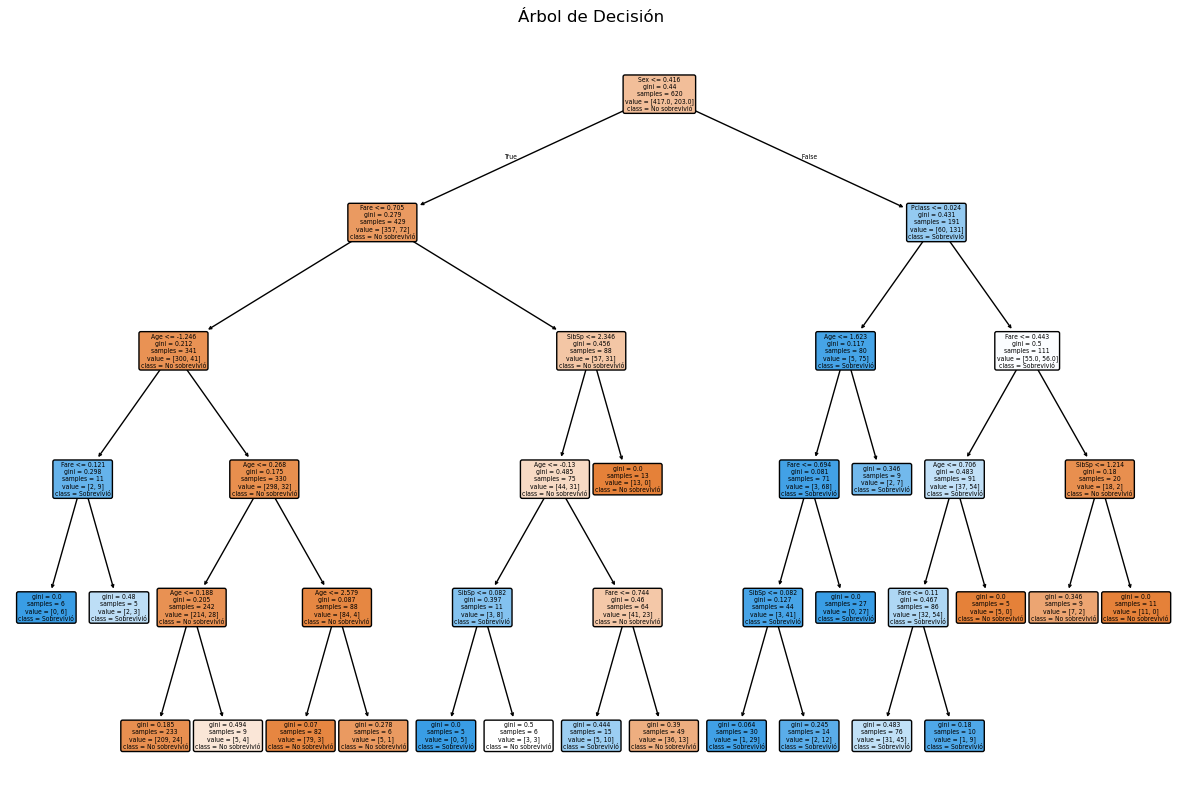

In [104]:
# 11. Gráfica del árbol de decisión (si es pequeño)
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No sobrevivió', 'Sobrevivió'], rounded=True)
plt.title('Árbol de Decisión')
plt.show()

In [106]:
# 12. Interpretación y análisis de resultados
# Evaluación del desempeño:
# - Un modelo con una precisión >70% generalmente se considera bueno para problemas de clasificación binaria.
# - La variable Sex aparece en la raíz del árbol, ya que en el Titanic, el género fue un factor importante en la supervivencia. Muchas mujeres sobrevivieron debido a la política de "mujeres y niños primero"
# - Los pasajeros de primera clase Pclass=1 tuvieron una mayor probabilidad de sobrevivir en comparación con los de segunda y tercera clase.
# - Los precios de los boletos estaban correlacionados con la clase (Pclass). Pasajeros con tarifas más altas probablemente viajaban en primera clase y tenían una mayor probabilidad de sobrevivir.

# - Conclución:
# - Las mujeres tuvieron mayores probabilidades de sobrevivir
# - Los pasajeros de primera clase fueron evacuados antes que los de segunda y tercera clase.
# - Los niños tuvieron prioridad en los botes salvavidas.